### Stock Market Prediction And Forecasting Using Stacked LSTM

In [8]:
### Keras and Tensorflow >2.0
!pip install pandas_datareader


In [10]:
### Data Collection
import pandas_datareader as pdr  
key="dcbdde936e7866b9ae45c380c36a2f04c62bcc90"

ModuleNotFoundError: No module named 'pandas_datareader'

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\saini\AppData\Local\Temp\ipykernel_75252\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-11-19 00:00:00+00:00,266.29,268.00,265.39,267.90,19069597,64.542005,64.956466,64.323867,64.932228,76278388,0.0,1.0
1,AAPL,2019-11-20 00:00:00+00:00,263.19,266.08,260.40,265.54,26609919,63.790643,64.491106,63.114417,64.360224,106439676,0.0,1.0
2,AAPL,2019-11-21 00:00:00+00:00,262.01,264.01,261.18,263.69,30348778,63.504640,63.989390,63.303469,63.911830,121395112,0.0,1.0
3,AAPL,2019-11-22 00:00:00+00:00,261.78,263.18,260.84,262.59,16331263,63.448894,63.788219,63.221062,63.645218,65325052,0.0,1.0
4,AAPL,2019-11-25 00:00:00+00:00,266.37,266.44,262.52,262.71,21029517,64.561395,64.578361,63.628251,63.674303,84118068,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-11-11 00:00:00+00:00,224.23,225.70,221.500,225.00,42005602,224.23,225.70,221.500,225.00,42005602,0.0,1.0
1253,AAPL,2024-11-12 00:00:00+00:00,224.23,225.59,223.355,224.55,40398299,224.23,225.59,223.355,224.55,40398299,0.0,1.0
1254,AAPL,2024-11-13 00:00:00+00:00,225.12,226.65,222.760,224.01,48566217,225.12,226.65,222.760,224.01,48566217,0.0,1.0
1255,AAPL,2024-11-14 00:00:00+00:00,228.22,228.87,225.000,225.02,44923941,228.22,228.87,225.000,225.02,44923941,0.0,1.0
1256,AAPL,2024-11-15 00:00:00+00:00,225.00,226.92,224.270,226.40,47923696,225.00,226.92,224.270,226.40,47923696,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1

0       266.29
1       263.19
2       262.01
3       261.78
4       266.37
         ...  
1252    224.23
1253    224.23
1254    225.12
1255    228.22
1256    225.00
Name: close, Length: 1257, dtype: float64

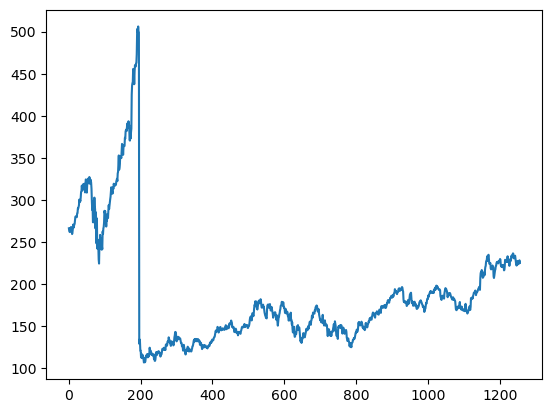

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
df1

0       266.29
1       263.19
2       262.01
3       261.78
4       266.37
         ...  
1252    224.23
1253    224.23
1254    225.12
1255    228.22
1256    225.00
Name: close, Length: 1257, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[0.39937383]
 [0.39160927]
 [0.38865373]
 ...
 [0.29625548]
 [0.30402004]
 [0.29595492]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(817, 440)

In [22]:
train_data

array([[3.99373826e-01],
       [3.91609267e-01],
       [3.88653726e-01],
       [3.88077646e-01],
       [3.99574202e-01],
       [3.94364433e-01],
       [4.03256105e-01],
       [4.01778334e-01],
       [3.94038823e-01],
       [3.82241703e-01],
       [3.87977458e-01],
       [3.97595492e-01],
       [4.10444584e-01],
       [4.00951785e-01],
       [4.04859111e-01],
       [4.10594865e-01],
       [4.12323106e-01],
       [4.21565435e-01],
       [4.33362555e-01],
       [4.34740138e-01],
       [4.33061991e-01],
       [4.33763306e-01],
       [4.32310582e-01],
       [4.43731997e-01],
       [4.44408265e-01],
       [4.58534753e-01],
       [4.58259236e-01],
       [4.62567314e-01],
       [4.67902317e-01],
       [4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],
       [4.91797120e-01],
       [5.07927364e-01],
       [5.09680651e-01],
       [5.26286788e-01],
       [5.15566688e-01],
       [5.12210394e-01],
       [5.21978710e-01],


In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\saini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0408 - val_loss: 8.3886e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0111 - val_loss: 7.3942e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0117 - val_loss: 5.0874e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0083 - val_loss: 8.7563e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0104 - val_loss: 0.0012
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0074 - val_loss: 3.0586e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0071 - val_loss: 3.1360e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0066 - val_loss: 7.0788e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0035 - val_loss: 5.1646e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0025 - val_loss: 6.7212e-04
Epoch 12/100
12

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.17.0'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

191.93475116997323

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

195.2451327400414

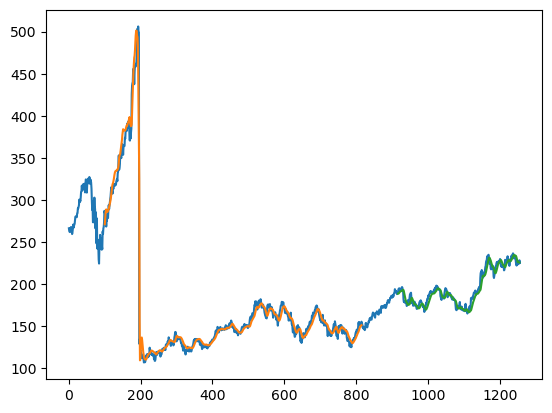

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

440

In [41]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.2599373825923606,
 0.27529117094552286,
 0.2841077019411396,
 0.287313713212273,
 0.29931120851596743,
 0.30301815904821533,
 0.3051721978710081,
 0.3159423919849717,
 0.3023919849718221,
 0.30983093299937375,
 0.3194990607388854,
 0.32055103318722594,
 0.3056731371321227,
 0.29390106449592984,
 0.2942266750156543,
 0.2933500313087038,
 0.2959799624295553,
 0.2797745773324984,
 0.27714464621164686,
 0.2783218534752661,
 0.2790231684408265,
 0.2804257983719474,
 0.2886412022542267,
 0.27932373199749533,
 0.28308077645585467,
 0.25655604257983716,
 0.2514464621164683,
 0.2579336255479023,
 0.26667501565435187,
 0.2740137758296806,
 0.27724483406386974,
 0.28661239824671253,
 0.28773951158422034,
 0.29525360050093924,
 0.29858484658735124,
 0.2981840951784595,
 0.29973700688791477,
 0.29946149029430175,
 0.29477770820288035,
 0.30056355666875384,
 0.30141515341264863,
 0.30354414527238566,
 0.29968691296180333,
 0.30795241077019403,
 0.30597370068879143,
 0.290369442705072,
 0.28556042

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.27529117 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722
 0.31594239 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314
 0.29390106 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465
 0.27832185 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078
 0.25655604 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483
 0.2866124  0.28773951 0.2952536  0.29858485 0.2981841  0.29973701
 0.29946149 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691
 0.30795241 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528
 0.28571071 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415
 0.27539136 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105
 0.29938635 0.30226675 0.30294302 0.31599249 0.2989856  0.30041327
 0.29763306 0.30046337 0.28766437 0.29788353 0.30732624 0.30607389
 0.30234189 0.3117345  0.31812148 0.31293676 0.31386349 0.32100188
 0.32470883 0.32315592 0.31038197 0.30990607 0.31201002 0.31699436
 0.31767063 0.30872887 0.29823419 0.2907201  0.2884

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
import matplotlib.pyplot as plt

In [49]:
len(df1)

1257

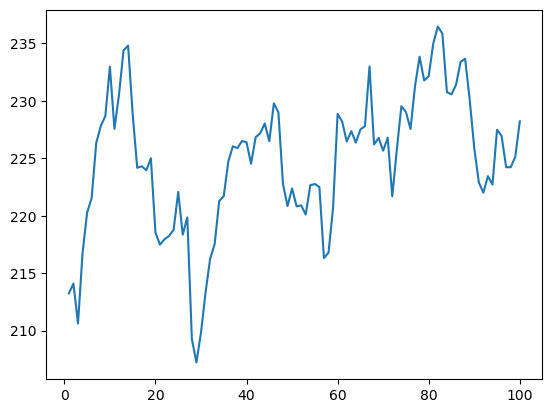

In [51]:
# Ensure day_new and df1[1156:] have the same length
# Adjust length if needed
plt.plot(day_new[:100], scaler.inverse_transform(df1[1156:1256]))  # Adjust the slicing to match lengths


101 101


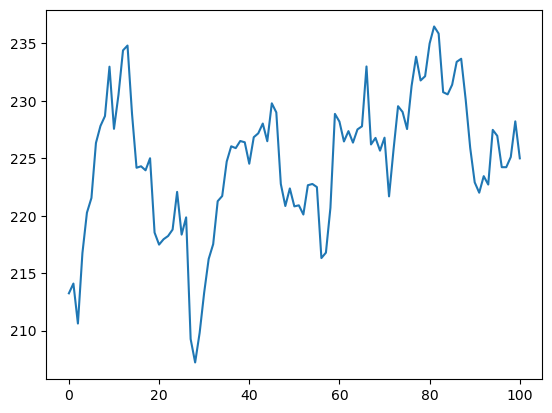

In [59]:
# Make day_new have 101 points if df1[1156:] has 101 entries
day_new = range(len(df1[1156:]))
print(len(day_new), len(scaler.inverse_transform(df1[1156:])))
plt.plot(day_new, scaler.inverse_transform(df1[1156:]))
df1_flat = scaler.inverse_transform(df1[1156:]).flatten()


Length of day_pred: 30
Shape of scaler.inverse_transform(lst_output): (30, 1)


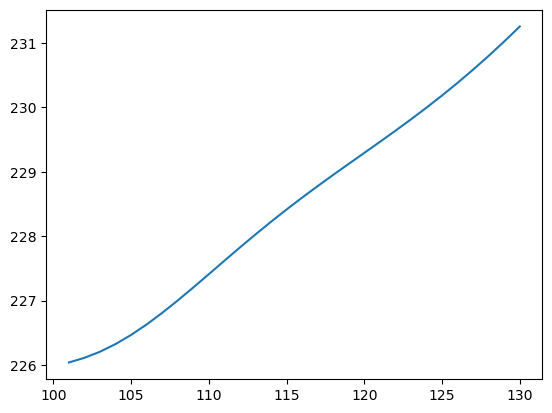

In [60]:
# Check the lengths
print(f"Length of day_pred: {len(day_pred)}")
print(f"Shape of scaler.inverse_transform(lst_output): {scaler.inverse_transform(lst_output).shape}")

# Adjust if needed
plt.plot(day_pred[:len(lst_output)], scaler.inverse_transform(lst_output))


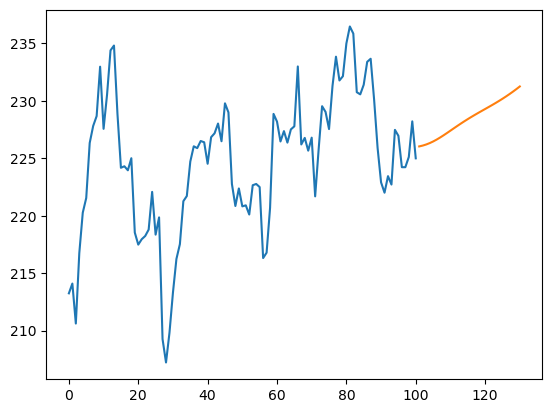

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

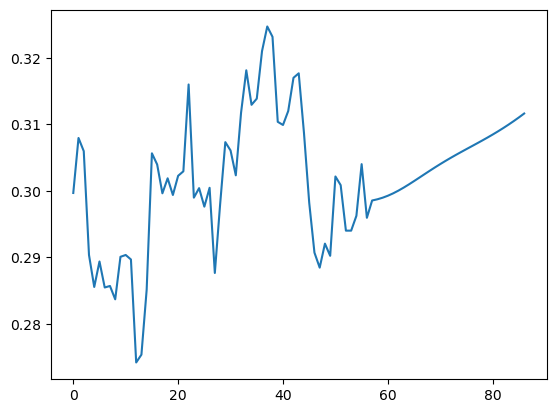

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

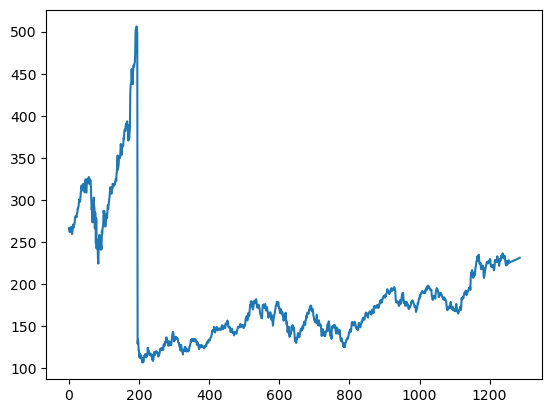

In [57]:
plt.plot(df3)